# Real Estate Price Prediction Dataset Analysis

### Analiza si predictia folosind metoda kNN (k Nearst Neighbours)

### Etape:
#### 1.Pre-procesarea datelor
#### 2.Interpretarea datelor
#### 3.Construirea regresiei folosid kNN

In [2]:
#---Importarea librariilor utile---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
#---Citirea setului de date ---
data = pd.read_csv('Real Estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Etapa1. Pre-procesarea datelor

In [4]:
#---Stergerea variabilelor independente nesemnificative---
#---Coloana 'No' si 'Transaction date' nu au sens in contextul analizei

df = data.copy()
df = df.drop(['No'], axis = 1)
df = df.drop(['X1 transaction date'], axis = 1)
df.head(3)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3


In [5]:
#---Structura variabilelor---
df.info()
#---Observam tipul variabilelor si faptul ca nu exista valori null (414/414 non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [6]:
#---Summary stats---
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<AxesSubplot:title={'center':'X2 house age'}>,
        <AxesSubplot:title={'center':'X3 distance to the nearest MRT station'}>],
       [<AxesSubplot:title={'center':'X4 number of convenience stores'}>,
        <AxesSubplot:title={'center':'X5 latitude'}>],
       [<AxesSubplot:title={'center':'X6 longitude'}>,
        <AxesSubplot:title={'center':'Y house price of unit area'}>]],
      dtype=object)

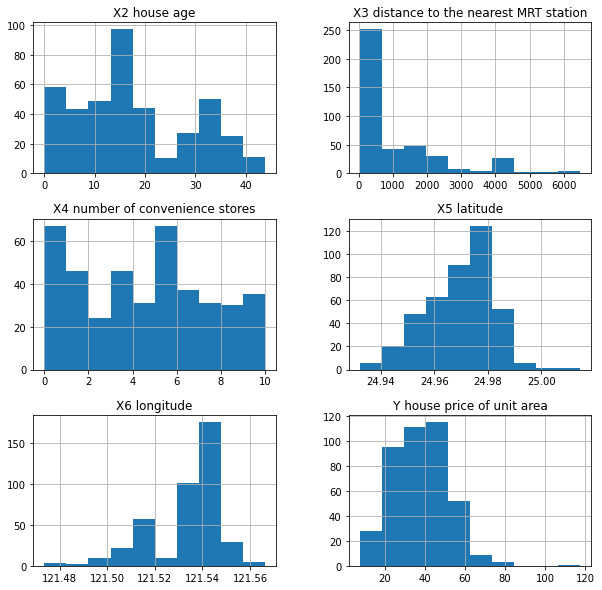

In [7]:
#---Distributia variabilelor
df.hist(figsize=(10,10))

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

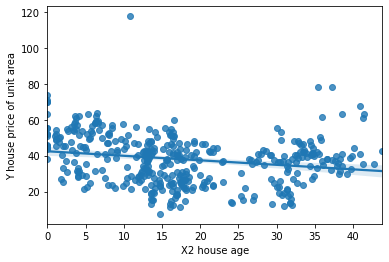

In [8]:
#---Relatia liniara dintre pret si anul construirii---
sns.regplot(x = df['X2 house age'], y = df['Y house price of unit area'])


<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

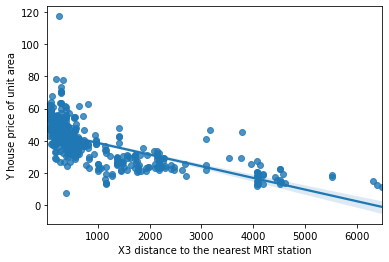

In [9]:
#---Relatia liniara dintre pret si distanta catre cea mai apropiata statie de metrou---
sns.regplot(x = df['X3 distance to the nearest MRT station'], y = df['Y house price of unit area'])

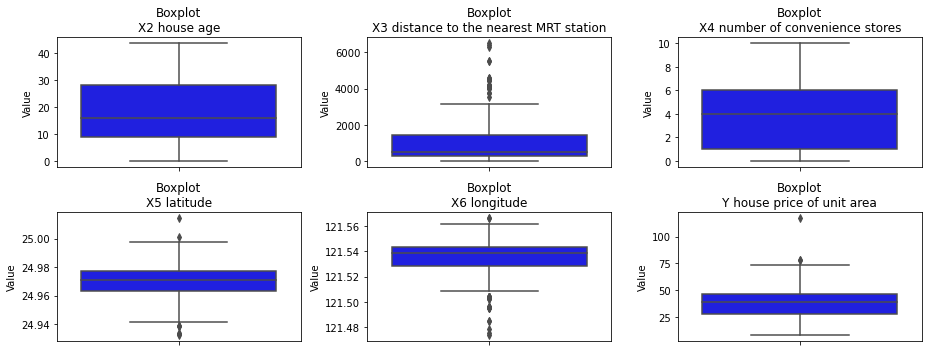

In [10]:
#---Valorile aberante---
plt.figure(figsize=(13,5))

for feat, grd in zip(df, range(231,237)):
    plt.subplot(grd)
    sns.boxplot(y=df[feat], color='blue')
    plt.ylabel('Value')
    plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

In [11]:
#---Corelatia dintre variabilele independende---
correlation_matrix = df.corr()
correlation_matrix["Y house price of unit area"]

X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64

In [12]:
#---Splitarea setului de date train-test---
X2 = df.drop(['Y house price of unit area'], axis = 1)
y2 = df['Y house price of unit area']
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

(331, 5) (83, 5)
(331,) (83,)


In [13]:
#---Scalarea datelor---

#---Metoda 1: MinMax Scaller---
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm_2 = mms.fit_transform(X_train_2)
X_test_norm_2 = mms.transform(X_test_2)

#---Metoda 2: Standard Scaller---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_std_2 = scaler.transform(X_train_2)
X_test_std_2 = scaler.transform(X_test_2)

(331, 5)
(83, 5)


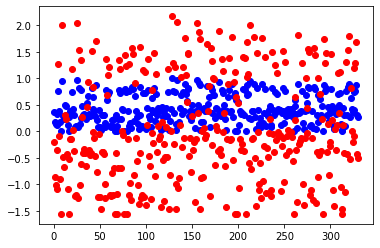

In [14]:
#---Compararea metodelor folosite in scalare---
xx = np.arange(len(X_train_std_2))
yy1 = X_train_norm_2[:,0]
yy2 = X_train_std_2[:,0]
plt.scatter(xx,yy1,color='b')
plt.scatter(xx,yy2,color='r')

print(X_train_std_2.shape)
print(X_test_std_2.shape)

In [15]:
#---Contruirea unui model de regresie liniara,pentru setul de train, folosind OLS---
#---Pentru a intelege mai bine datele---

import statsmodels.api as sm
model_ols = sm.OLS(y_train_2, X_train_norm_2)
fitted = model_ols.fit()
print(fitted.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.940
Model:                                    OLS   Adj. R-squared (uncentered):              0.939
Method:                         Least Squares   F-statistic:                              1023.
Date:                        Tue, 19 Apr 2022   Prob (F-statistic):                   7.79e-197
Time:                                11:11:05   Log-Likelihood:                         -1233.8
No. Observations:                         331   AIC:                                      2478.
Df Residuals:                             326   BIC:                                      2497.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

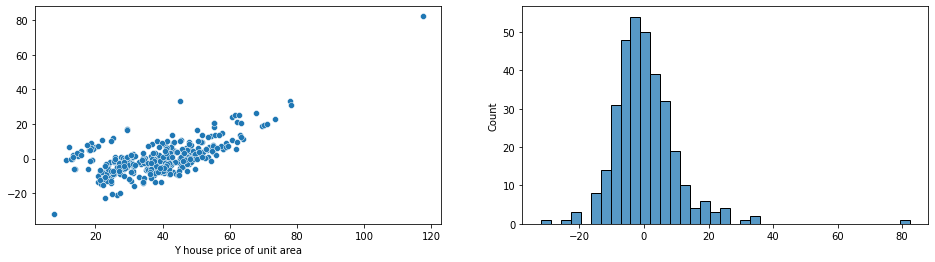

In [16]:
#---Observarea distributiei---
from scipy.stats import shapiro
fig, ax = plt.subplots(figsize=(16,4), ncols=2)
ax[0] = sns.scatterplot(x=y_train_2, y=fitted.resid, ax=ax[0])
ax[1] = sns.histplot(fitted.resid, ax=ax[1])

### Contruirea modelului de regresie kNN

In [17]:
#---Cautarea optima pentru valoarea lui k---
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train_norm_2, y_train_2,)

gridsearch.best_params_

{'n_neighbors': 9}

k=1, train_accuracy=98.40%, test_accuracy=49.11%
k=3, train_accuracy=82.85%, test_accuracy=62.70%
k=5, train_accuracy=76.51%, test_accuracy=65.10%
k=7, train_accuracy=71.66%, test_accuracy=62.32%
k=9, train_accuracy=69.54%, test_accuracy=69.09%
k=11, train_accuracy=67.99%, test_accuracy=69.85%
k=13, train_accuracy=66.20%, test_accuracy=69.96%
k=15, train_accuracy=65.36%, test_accuracy=69.60%
k=17, train_accuracy=65.20%, test_accuracy=70.20%
k=19, train_accuracy=64.80%, test_accuracy=71.18%
k=21, train_accuracy=63.86%, test_accuracy=71.19%
k=23, train_accuracy=63.58%, test_accuracy=71.38%
k=25, train_accuracy=63.22%, test_accuracy=71.79%
k=27, train_accuracy=62.85%, test_accuracy=72.35%
k=29, train_accuracy=62.48%, test_accuracy=72.01%
k=31, train_accuracy=62.12%, test_accuracy=72.90%
k=33, train_accuracy=61.50%, test_accuracy=72.89%
k=35, train_accuracy=60.87%, test_accuracy=72.55%
k=37, train_accuracy=60.07%, test_accuracy=72.35%
k=39, train_accuracy=59.36%, test_accuracy=72.40%
k=41,

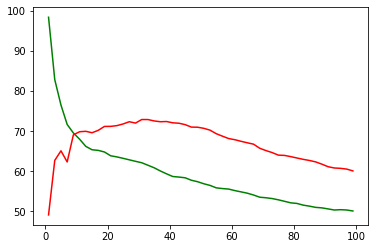

In [18]:
k_values = np.arange(1,100,2)
train_score = []
val_score = []

for k in k_values:
    model1 = KNeighborsRegressor(n_neighbors = k, p = 1)
    model1.fit(X_train_norm_2, y_train_2)
    
    train_score1 = model1.score(X_train_norm_2, y_train_2)
    train_score.append(train_score1*100)
    
    value_score = model1.score(X_test_norm_2, y_test_2)
    val_score.append(value_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score1 * 100, value_score*100))

plt.plot(k_values,train_score,'g')
plt.plot(k_values,val_score,'r')

In [25]:
#---Initializarea modelului---

#---Hyper Parametrii
#---n_neighbors = numarul de vecini pentru care se va calcula distanta
#---p = paramentru folosit in calculul distantei minkowski
#---p = 1 - distanta manhatan
#---p = 2 - distanta euclidiana
#---Algoritmul brute force search este foarte eficient deoarece ia in considerare toate posibilitatile populatiei 
knn = KNeighborsRegressor(n_neighbors = 3, p = 2, algorithm = 'brute')

#fitting
knn.fit(X_train_norm_2, y_train_2)

KNeighborsRegressor(algorithm='brute', n_neighbors=3)

In [24]:
pred = knn.predict(X_test_norm_2)
c = pd.DataFrame(pred, columns=['Estimated Price'])
d = pd.DataFrame(y_test_2)
d = y_test_2.reset_index(drop=True)
ynew = pd.concat([c,d], axis=1)
ynew

,Estimated Price,Y house price of unit area
0,26.995,27.3
1,53.725,54.4
2,26.100,22.0
3,20.180,11.6
4,44.355,45.4
...,...,...
78,41.070,33.1
79,48.260,59.6
80,50.285,40.8
81,43.760,52.2
